# Laptop Price Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns
### Continuous valued features

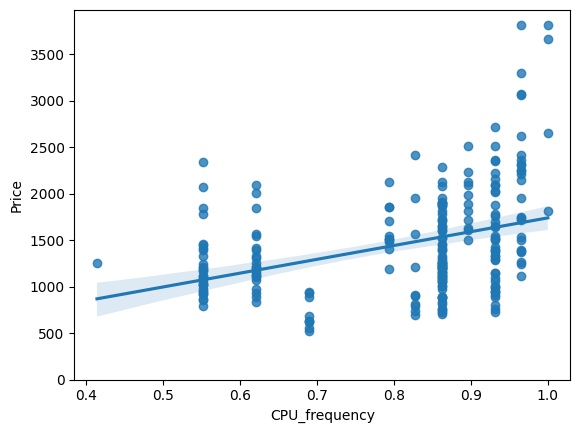

In [6]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
plt.show()

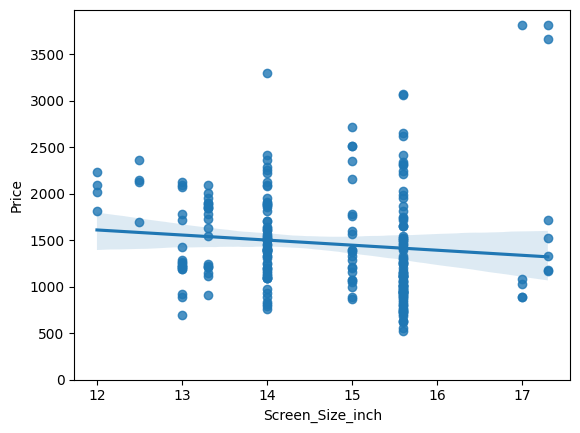

In [8]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
plt.show()

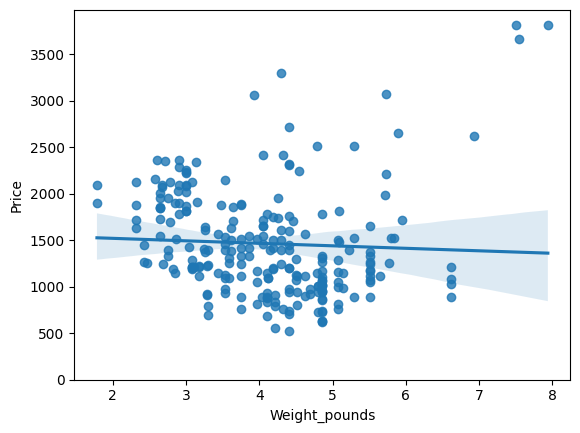

In [10]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
plt.show()

#### Correlation of 3 Variablas against Price

In [13]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


## Categorical features

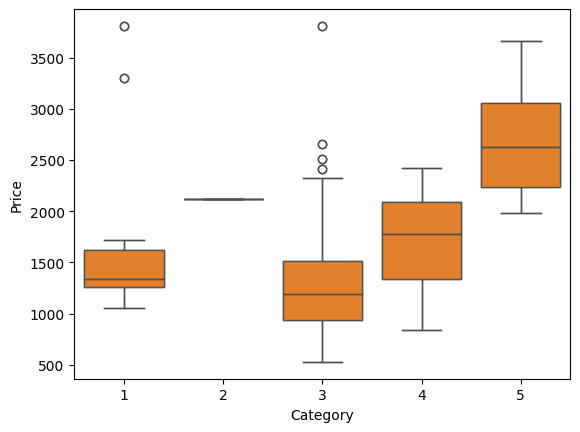

In [18]:
sns.boxplot(x="Category", y="Price", data=df)
plt.show()

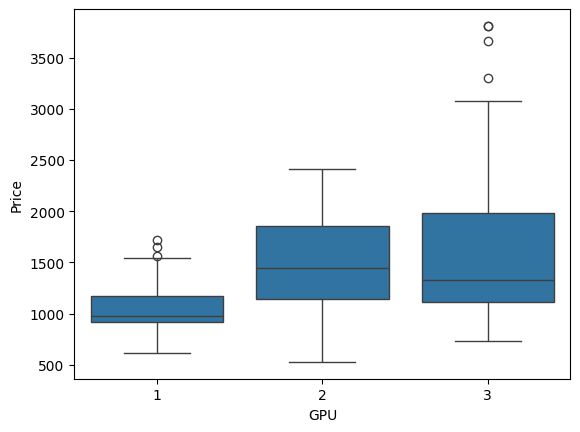

In [20]:
sns.boxplot(x="GPU", y="Price", data=df)
plt.show()

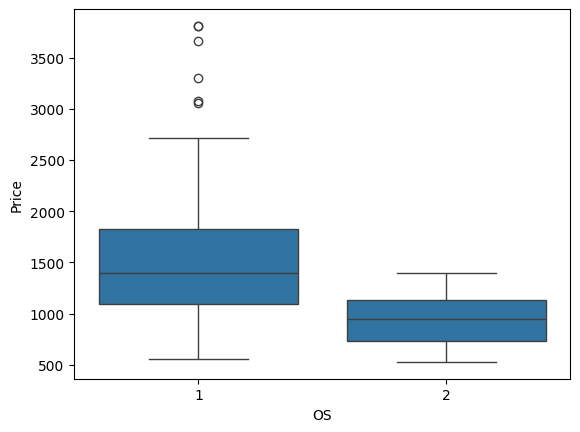

In [22]:
sns.boxplot(x="OS", y="Price", data=df)
plt.show()

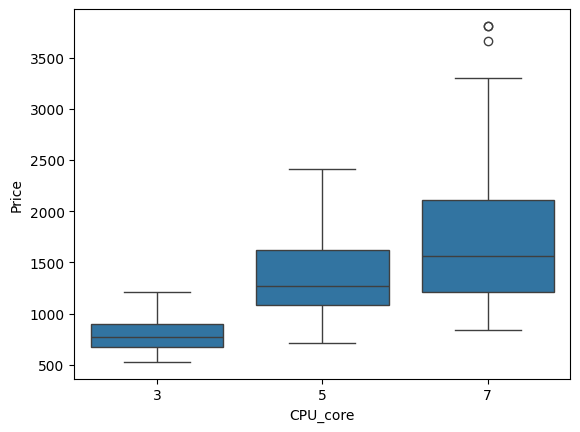

In [24]:
sns.boxplot(x="CPU_core", y="Price", data=df)
plt.show()

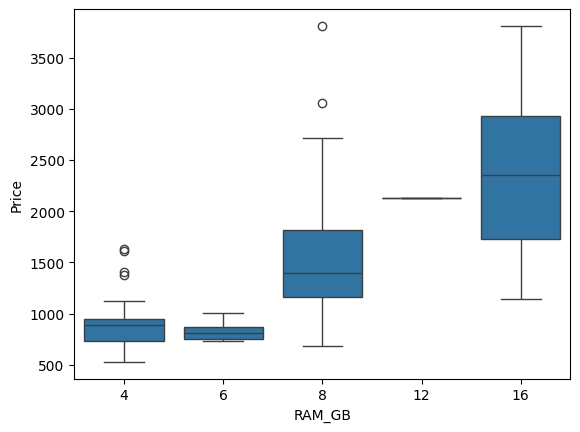

In [26]:
sns.boxplot(x="RAM_GB", y="Price", data=df)
plt.show()

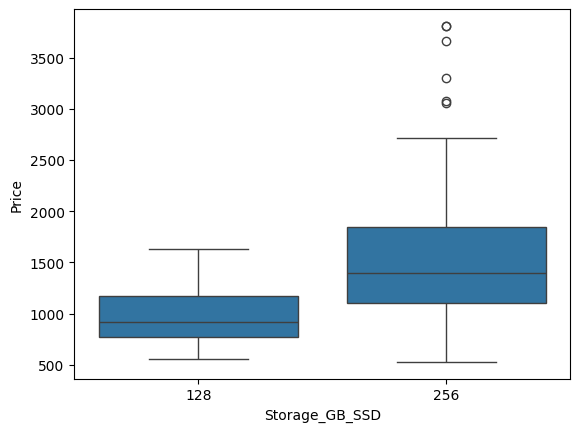

In [28]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
plt.show()

# Task 2 - Descriptive Statistical Analysis

In [36]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [34]:
print(df.describe(include=['object']))

       Manufacturer Price-binned
count           238          238
unique           11            3
top            Dell          Low
freq             71          160


# Task 3 - GroupBy and Pivot Tables

In [43]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
grouped_test1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [45]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

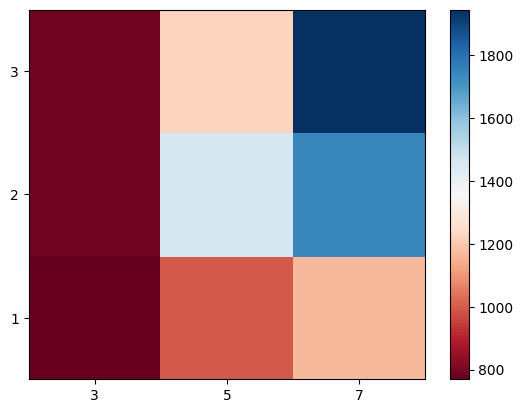

In [57]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

# Task 4 - Pearson Correlation and p-values

In [60]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118267  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428 

# 📌 Correlation Analysis in Data Science

## 🔹 What is Correlation?
- **Correlation** measures the strength and direction of a linear relationship between two numerical variables.  
- The most common metric is the **Pearson Correlation Coefficient (r)**.  
- Range: **-1 to +1**

---

## 🔹 Pearson Correlation Coefficient (r)
- **+1** → Perfect positive linear relationship  
- **-1** → Perfect negative linear relationship  
- **0** → No linear relationship  

---

## 🔹 Rule of Thumb for Interpreting Correlation

| Correlation (r) | Strength of Relationship |
|-----------------|--------------------------|
| **0.00 – 0.19** | Very weak / negligible   |
| **0.20 – 0.39** | Weak                     |
| **0.40 – 0.59** | Moderate                 |
| **0.60 – 0.79** | Strong                   |
| **0.80 – 1.00** | Very strong              |

⚠️ Note:  
- The **sign (+/-)** shows the **direction** of the relationship.  
- Positive → As one variable increases, the other increases.  
- Negative → As one variable increases, the other decreases.  

---

## 🔹 P-value in Correlation
- Tests if the correlation is **statistically significant**.  
- **p ≤ 0.05** → Significant relationship (unlikely due to chance).  
- **p > 0.05** → Not significant (relationship may be random).  

---


# 📊 Correlation Analysis with Price

| Feature           | r (Correlation) | p-value              | Strength / Direction         | Significant? | Interpretation |
|-------------------|-----------------|----------------------|------------------------------|--------------|----------------|
| **RAM_GB**        | 0.55            | 3.68e-20             | Moderate Positive            | ✅ Yes        | More RAM → higher price |
| **CPU_frequency** | 0.37            | 5.50e-09             | Weak–Moderate Positive       | ✅ Yes        | Faster CPU → higher price |
| **Storage_GB_SSD**| 0.24            | 0.00015              | Weak Positive                | ✅ Yes        | Larger SSD → slightly higher price |
| **Screen_Size_inch** | -0.11        | 0.088 (> 0.05)       | Very Weak Negative           | ❌ No         | No meaningful effect on price |
| **Weight_pounds** | -0.05           | 0.44 (> 0.05)        | No Correlation               | ❌ No         | Laptop weight not related to price |
| **CPU_core**      | 0.46            | 7.91e-14             | Moderate Positive            | ✅ Yes        | More cores → higher price |
| **OS**            | -0.22           | 0.00057              | Weak Negative                | ✅ Yes        | Certain OS linked to lower prices |
| **GPU**           | 0.29            | 6.16e-06             | Weak Positive                | ✅ Yes        | Better GPU → slightly higher price |
| **Category**      | 0.29            | 7.22e-06             | Weak Positive                | ✅ Yes        | Category differences affect price slightly |

---

## ✅ Key Insights
- **Strongest predictors of Price:** `RAM_GB (0.55)` and `CPU_core (0.46)`  
- **Moderate predictors:** `CPU_frequency`, `GPU`, `Category`, `Storage_GB_SSD`  
- **Weak/No effect:** `Screen_Size_inch`, `Weight_pounds`  
- **Negative effect:** `OS` (some OS types linked with lower prices)  
